In [146]:
# import statements
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sklearn
import glob as glob

path_to_data = '/home/disk/pna2/aodhan/SurfaceTrendLearning/*.nc'
ModelDataFiles = glob.glob(path_to_data)

input_to_model = []
output = []
for datafile in ModelDataFiles:    
    xarray_file = xr.open_dataset(datafile)
    trend_data = xarray_file.to_array()[0]
    natural_trends = trend_data[:,0].to_numpy()
    forced_trend  = trend_data[:,1].to_numpy()
    #weights = np.cos(np.deg2rad(np.arange(-87.5,87.51,2.5)))

    natural_trends = np.reshape(natural_trends, (np.shape(natural_trends)[0]*np.shape(natural_trends)[1], 72,144))
    forced_trends = np.reshape(forced_trend, (np.shape(forced_trend)[0]*np.shape(forced_trend)[1], 72,144))

    true_trend_maps = natural_trends + forced_trends
    input_data = np.reshape(true_trend_maps, (np.shape(true_trend_maps)[0], np.shape(true_trend_maps)[1]*np.shape(true_trend_maps)[2]))
    reshaped_natural_trends = np.reshape(natural_trends[:,28:44,:], (np.shape(natural_trends)[0],16*144))
    reshaped_forced_trends = np.reshape(forced_trends[:,28:44,:], (np.shape(forced_trends)[0],16*144))
    tropical_avg_natural_trend = np.average(reshaped_natural_trends, axis=1)
    tropical_avg_forced_trend = np.nanmean(reshaped_forced_trends, axis=1)

    for i in input_data:
        input_to_model.append(i)
    for j in range(0,len(tropical_avg_natural_trend)):
        output.append([tropical_avg_natural_trend[j], tropical_avg_forced_trend[j]])
input_to_model = np.array(input_to_model)
output = np.array(output)

In [143]:
print(np.arange(-87.5,87.5,2.5))

[-87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.
 -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5 -30.
 -27.5 -25.  -22.5 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5   0.
   2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.
  32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5  60.
  62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85. ]


In [140]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(input_to_model, output, test_size=0.3, random_state=42)
y_test = np.array(y_test)
pls2 = PLSRegression(n_components=4)
pls_model = pls2.fit(X_train, y_train)
Y_pred = pls2.predict(X_test)

0.7920864367302795

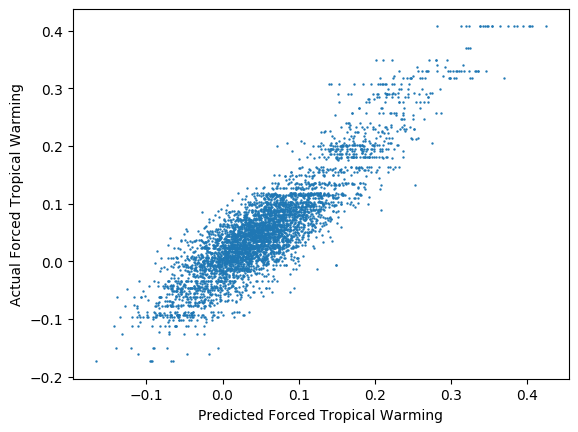

In [138]:
plt.scatter(Y_pred, y_test, s=0.5)
plt.xlabel('Predicted Forced Tropical Warming')
plt.ylabel('Actual Forced Tropical Warming')
stats.pearsonr(Y_pred[:,0], y_test)[0]**2


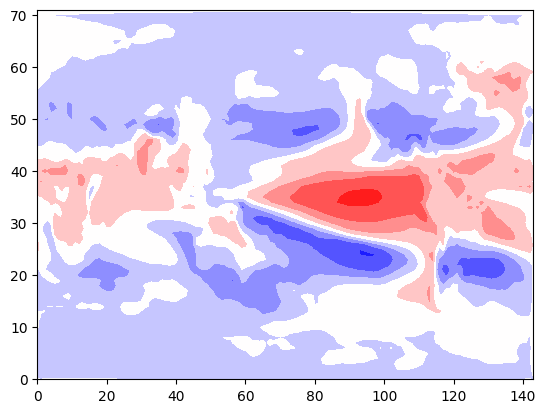

In [141]:
plt.contourf(np.reshape(pls_model.coef_[:,0], (72,144)), cmap='bwr')

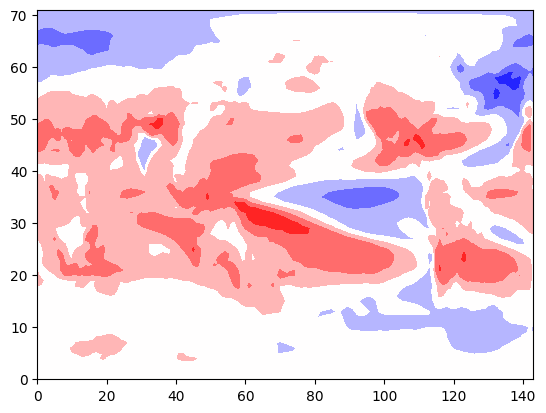

In [142]:
plt.contourf(np.reshape(pls_model.coef_[:,1], (72,144)), cmap='bwr')